In [7]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta', 'gamma', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Counting the number of mRNA molecules
Let $m(t)$ be the number of mRNA molecules with $k$ the rate of mRNA production and $\gamma$ the mRNA degradation rate. Then the number of mRNA molecules is given by a two state Markov process.
$$
(M-1)
{{k \atop\longrightarrow}\atop {\longleftarrow \atop  \gamma  }}
(M)
$$

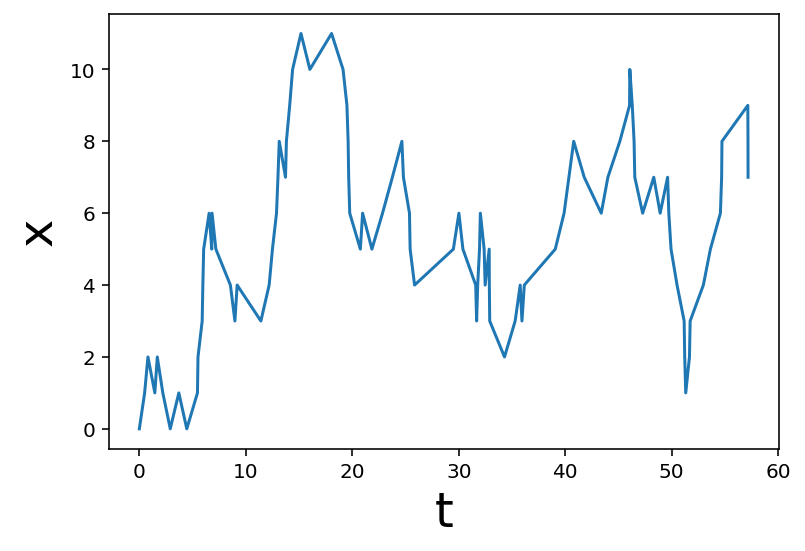

In [9]:
k = 1
gamma = 1
x0 = 0
Nsteps = 1000
X = zeros(Nsteps)
X[0] = x0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    u = rand(1)[0]
    if X[j-1] == 0:
        tau = -log(u)/(k)
        T[j] = T[j-1] + tau
        X[j] = X[j-1] + 1
    else:
        tau = -log(u)/(k+gamma)
        v = rand(1)[0]
        if v>gamma/(k+gamma):
            X[j]=X[j-1]+1 
        else:
            X[j]=X[j-1]-1
        T[j] = T[j-1] + tau


    
plot(T[:100], X[:100])
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

# Stochastic gene expression model with high and low states

$$
{\text{low} \atop (N=0.5)}
\quad
{{\alpha/\epsilon \atop\longrightarrow}\atop {\longleftarrow \atop  \beta/\epsilon}}
\quad
{\text{high} \atop (N=1)}\quad
$$
where $x$ and $y$ satisfy the ODEs
$$
\dot{x} = \gamma N(t) - \delta x
$$
The solution to the above linear ODE is
$$
x(t) = x_0 e^{-\delta(t - t_0)} + \frac{\gamma N(t)}{\delta}\left(1 -  e^{-\delta(t - t_0)}\right).
$$

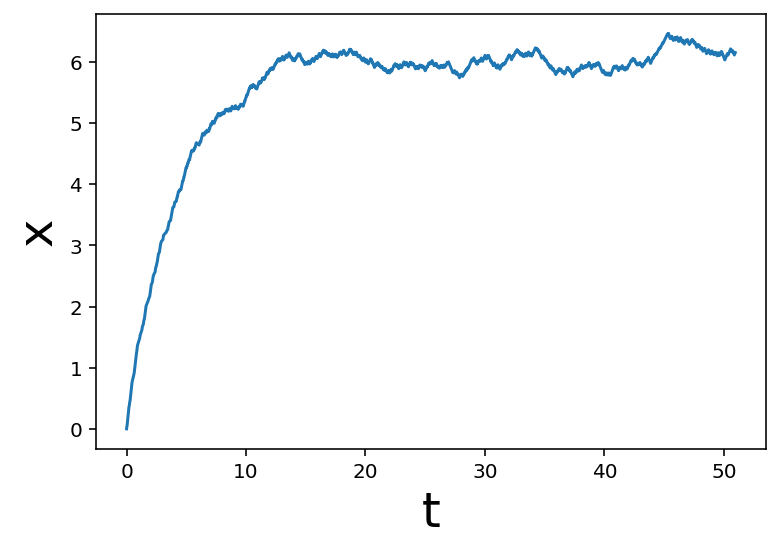

In [19]:
epsilon = 0.05
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
n0 = 1
x0 = 0
Nsteps = 1000
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    u = rand(1)[0]
    rate = beta/epsilon if N[j-1]==1 else alpha/epsilon
    tau = -log(u)/rate
    T[j] = T[j-1] + tau
    N[j] = 0.5 if N[j-1]==1 else 1
    ## update x using the exact solution above
    X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    
    
plot(T, X)
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);